In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from google.colab import drive
import os
import pandas as pd
import csv
import os
from glob import glob
import scipy.io.wavfile
import matplotlib.pyplot as plt
import pywt
import shutil
from pywt import wavedec

In [ ]:
drive.mount('/content/drive')
path_base = "/content/drive/MyDrive/Data Tugas Akhir"
Preprocess_N = f'{path_base}{os.sep}Preprocess_Normal/'
Extracted_wavelet = f'{path_base}{os.sep}Wavelet_Extracted_N/'
audio_files_N = glob(Preprocess_N  + '*.wav')

Mounted at /content/drive


In [ ]:
def wavelet_extraction(data, coeff, dwt, db, level):
    N = np.array(data).size
    a, ds = dwt[0], list(reversed(dwt[1:]))

    if coeff =='a':
        return pywt.upcoef('a', a, db, level=level)[:N]
    elif coeff == 'd':
        return pywt.upcoef('d', ds[level-1], db, level=level)[:N]
    else:
        raise ValueError("Invalid coefficients: {}".format(coeff))

In [ ]:
features_wavelet = []
wavelet_file = []
count = 1
db = 'db6'
level = 4
directory = Preprocess_N
for audio in os.listdir(directory):
    audio_path = directory+audio
    data_wave, sr = librosa.load(audio_path, res_type='kaiser_best')
    coeffs = pywt.wavedec(data_wave, db, level=level)
    A4 = wavelet_extraction(data_wave, 'a', coeffs, db, level)
    D4 = wavelet_extraction(data_wave, 'd', coeffs, db, level)
    D3 = wavelet_extraction(data_wave, 'd', coeffs, db, 3)
    D2 = wavelet_extraction(data_wave, 'd', coeffs, db, 2)
    D1 = wavelet_extraction(data_wave, 'd', coeffs, db, 1)
    wavelets = A4 + D4 + D3 + D2 + D1
    file_name = "Extracted_wavelet_N_%s.csv" % count
    pd.DataFrame(wavelets).to_csv(file_name)
    wavelet_file.append(file_name)
    features_wavelet.append(wavelets)
    count = count+1

In [ ]:
wavelet_file

['Extracted_wavelet_N_1.csv',
 'Extracted_wavelet_N_2.csv',
 'Extracted_wavelet_N_3.csv',
 'Extracted_wavelet_N_4.csv',
 'Extracted_wavelet_N_5.csv',
 'Extracted_wavelet_N_6.csv',
 'Extracted_wavelet_N_7.csv',
 'Extracted_wavelet_N_8.csv',
 'Extracted_wavelet_N_9.csv',
 'Extracted_wavelet_N_10.csv',
 'Extracted_wavelet_N_11.csv',
 'Extracted_wavelet_N_12.csv',
 'Extracted_wavelet_N_13.csv',
 'Extracted_wavelet_N_14.csv',
 'Extracted_wavelet_N_15.csv',
 'Extracted_wavelet_N_16.csv',
 'Extracted_wavelet_N_17.csv',
 'Extracted_wavelet_N_18.csv',
 'Extracted_wavelet_N_19.csv',
 'Extracted_wavelet_N_20.csv',
 'Extracted_wavelet_N_21.csv',
 'Extracted_wavelet_N_22.csv',
 'Extracted_wavelet_N_23.csv',
 'Extracted_wavelet_N_24.csv',
 'Extracted_wavelet_N_25.csv',
 'Extracted_wavelet_N_26.csv',
 'Extracted_wavelet_N_27.csv',
 'Extracted_wavelet_N_28.csv',
 'Extracted_wavelet_N_29.csv',
 'Extracted_wavelet_N_30.csv',
 'Extracted_wavelet_N_31.csv',
 'Extracted_wavelet_N_32.csv',
 'Extracted_wavel

In [ ]:
base_directory = "/content"
for f in wavelet_file:
    src_path = os.path.join(base_directory, f)
    dst_path = os.path.join(Extracted_wavelet, f)
    shutil.move(src_path, dst_path)

In [ ]:
features_wavelet

[array([-1.5958078e-08, -7.0765594e-08, -4.3675360e-07, ...,
         4.2342211e-07,  4.5791563e-07,  5.7288793e-07], dtype=float32),
 array([-2.2248063e-08, -9.8658319e-08, -3.6596620e-07, ...,
         1.7412124e-06,  1.3134178e-06, -8.8250829e-08], dtype=float32),
 array([-1.0824643e-07, -4.8001533e-07, -1.1017318e-06, ...,
         2.8411961e-07,  6.8660358e-07,  1.1798484e-06], dtype=float32),
 array([ 3.6839187e-06,  1.6336220e-05,  4.7155398e-05, ...,
        -1.7264704e-04, -1.9781156e-04, -2.1996438e-04], dtype=float32),
 array([ 1.7822605e-11,  7.9033446e-11, -3.3547289e-09, ...,
        -1.3171983e-04, -1.3328604e-04, -1.2738629e-04], dtype=float32),
 array([-1.5855125e-08, -7.0309042e-08, -9.9774780e-08, ...,
         4.4273183e-05,  4.7778616e-05,  3.1763167e-05], dtype=float32),
 array([ 3.9261554e-08,  1.7410412e-07,  8.5105336e-07, ...,
         1.2443192e-05,  8.7216822e-06, -5.2343544e-06], dtype=float32),
 array([-7.4443506e-08, -3.3011739e-07, -5.1226846e-07, ...,
 

**MEAN**

In [ ]:
wavelet_means = []
for i in features_wavelet:
  mean = np.mean(i)
  wavelet_means.append(mean)

In [ ]:
df_mean = pd.DataFrame(wavelet_means, columns=['Mean'])
df_mean

,Mean
0,-7.025807e-09
1,-1.556067e-08
2,-5.383644e-08
3,1.502731e-06
4,-3.103035e-08
...,...
275,1.334908e-07
276,1.452190e-08
277,-6.577933e-09
278,1.130831e-08


**STD**

In [ ]:
wavelet_std = []
for i in features_wavelet:
  std = np.std(i)
  wavelet_std.append(std)

In [ ]:
df_std = pd.DataFrame(wavelet_std, columns=['Std'])
df_std

,Std
0,0.000066
1,0.000124
2,0.000450
3,0.000743
4,0.000415
...,...
275,0.000284
276,0.000117
277,0.000365
278,0.000206


**MAX**

In [ ]:
wavelet_max = []
for i in features_wavelet:
  max = np.max(i)
  wavelet_max.append(max)

In [ ]:
df_max = pd.DataFrame(wavelet_max, columns=['Max'])
df_max

,Max
0,0.002409
1,0.003158
2,0.004558
3,0.010726
4,0.008534
...,...
275,0.004540
276,0.003222
277,0.008719
278,0.007822


**MIN**

In [ ]:
wavelet_Min = []
for i in features_wavelet:
  min = np.min(i)
  wavelet_Min.append(min)

In [ ]:
df_min = pd.DataFrame(wavelet_Min, columns=['Min'])
df_min

,Min
0,-0.001755
1,-0.002600
2,-0.005261
3,-0.007889
4,-0.005778
...,...
275,-0.004703
276,-0.003165
277,-0.011868
278,-0.008486


**MED**

In [ ]:
wavelet_Med = []
for i in features_wavelet:
  Med = np.median(i)
  wavelet_Med.append(Med)

In [ ]:
df_med = pd.DataFrame(wavelet_Med, columns=['Med'])
df_mean

,Mean
0,-7.025807e-09
1,-1.556067e-08
2,-5.383644e-08
3,1.502731e-06
4,-3.103035e-08
...,...
275,1.334908e-07
276,1.452190e-08
277,-6.577933e-09
278,1.130831e-08


**VAR**

In [ ]:
wavelet_Var = []
for i in features_wavelet:
  Var = np.var(i)
  wavelet_Var.append(Var)

In [ ]:
df_var = pd.DataFrame(wavelet_Var, columns=['Var'])
df_var

,Var
0,4.341976e-09
1,1.528059e-08
2,2.021535e-07
3,5.527448e-07
4,1.726204e-07
...,...
275,8.055900e-08
276,1.380280e-08
277,1.332748e-07
278,4.241861e-08


**SKEW**

In [ ]:
from scipy.stats import skew

In [ ]:
wavelet_Skew = []
for i in features_wavelet:
  Skew = skew(i, axis=0, bias=True)
  wavelet_Skew.append(Skew)

In [ ]:
skew_means = []
for i in wavelet_Skew:
  mean = np.mean(i)
  skew_means.append(mean)

In [ ]:
df_skew = pd.DataFrame(skew_means, columns=['Skew'])
df_skew

,Skew
0,2.474493
1,0.828237
2,-1.024515
3,2.231036
4,2.228800
...,...
275,1.263980
276,-0.170160
277,-1.202629
278,-0.202955


**Q1**

In [ ]:
wavelet_Q1 = []
for i in features_wavelet:
  Q1 = np.percentile(i, 25)
  wavelet_Q1.append(Q1)

In [ ]:
df_q1 = pd.DataFrame(wavelet_Q1, columns=['Q1'])
df_q1

,Q1
0,-3.122490e-07
1,-4.003604e-07
2,-4.570763e-06
3,-1.797313e-06
4,-8.610364e-06
...,...
275,-5.707461e-06
276,-6.741095e-08
277,-1.077026e-05
278,-1.085348e-06


**Q3**

In [ ]:
wavelet_Q3 = []
for i in features_wavelet:
  Q3 = np.percentile(i, 75)
  wavelet_Q3.append(Q3)

In [ ]:
df_q3 = pd.DataFrame(wavelet_Q3, columns=['Q3'])
df_q3

,Q3
0,2.651061e-07
1,4.077891e-07
2,3.608785e-06
3,1.679290e-06
4,8.691581e-06
...,...
275,5.104442e-06
276,6.442572e-08
277,9.278368e-06
278,1.310656e-06


**IQR**

In [ ]:
wavelet_IQR = []
IQR = np.array(wavelet_Q3) - np.array(wavelet_Q1)
wavelet_IQR.append(IQR)

In [ ]:
df_iqr = pd.DataFrame(wavelet_IQR)
df_iqr = df_iqr.transpose()

**RANGE**

In [ ]:
wavelet_range = []
Range = np.array(wavelet_max) - np.array(wavelet_Min)
wavelet_range.append(Range)

In [ ]:
df_range = pd.DataFrame(wavelet_range)
df_range = df_range.transpose()

**KURTOSIS**

In [ ]:
from scipy.stats import kurtosis

In [ ]:
wavelet_Kurt = []
for i in features_wavelet:
  Kurt = kurtosis(i, axis=0, bias=True)
  wavelet_Kurt.append(Kurt)

In [ ]:
kurt_means = []
for i in wavelet_Kurt:
  mean = np.mean(i)
  kurt_means.append(mean)

In [ ]:
df_kurt = pd.DataFrame(kurt_means, columns=['Kurt'])
df_kurt

,Kurt
0,252.797301
1,180.526298
2,38.084787
3,56.758168
4,84.818655
...,...
275,42.542479
276,124.545291
277,75.172558
278,383.436922


**PENGGABUNGAN**

In [ ]:
df_wavelet = pd.DataFrame()
df_wavelet['Mean_wavelet'] = df_mean['Mean']
df_wavelet['Std_wavelet'] = df_std['Std']
df_wavelet['Max_wavelet'] = df_max['Max']
df_wavelet['Min_wavelet'] = df_min['Min']
df_wavelet['Med_wavelet'] = df_med['Med']
df_wavelet['Var_wavelet'] = df_var['Var']
df_wavelet['Skew_wavelet'] = df_skew['Skew']
df_wavelet['Q1_wavelet'] = df_q1['Q1']
df_wavelet['Q3_wavelet'] = df_q3['Q3']
df_wavelet['IQR_wavelet'] = df_iqr[0]
df_wavelet['MinMax_wavelet'] = df_range[0]
df_wavelet['Kurt_wavelet'] = df_kurt['Kurt']
df_wavelet

,Mean_wavelet,Std_wavelet,Max_wavelet,Min_wavelet,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,MinMax_wavelet,Kurt_wavelet
0,-7.025807e-09,0.000066,0.002409,-0.001755,-3.749471e-22,4.341976e-09,2.474493,-3.122490e-07,2.651061e-07,5.773551e-07,0.004165,252.797301
1,-1.556067e-08,0.000124,0.003158,-0.002600,7.276224e-10,1.528059e-08,0.828237,-4.003604e-07,4.077891e-07,8.081496e-07,0.005757,180.526298
2,-5.383644e-08,0.000450,0.004558,-0.005261,-9.319693e-09,2.021535e-07,-1.024515,-4.570763e-06,3.608785e-06,8.179548e-06,0.009819,38.084787
3,1.502731e-06,0.000743,0.010726,-0.007889,2.350813e-09,5.527448e-07,2.231036,-1.797313e-06,1.679290e-06,3.476603e-06,0.018615,56.758168
4,-3.103035e-08,0.000415,0.008534,-0.005778,-2.972175e-09,1.726204e-07,2.228800,-8.610364e-06,8.691581e-06,1.730195e-05,0.014312,84.818655
...,...,...,...,...,...,...,...,...,...,...,...,...
275,1.334908e-07,0.000284,0.004540,-0.004703,-6.134837e-09,8.055900e-08,1.263980,-5.707461e-06,5.104442e-06,1.081190e-05,0.009243,42.542479
276,1.452190e-08,0.000117,0.003222,-0.003165,-4.909419e-22,1.380280e-08,-0.170160,-6.741095e-08,6.442572e-08,1.318367e-07,0.006387,124.545291
277,-6.577933e-09,0.000365,0.008719,-0.011868,-4.248742e-09,1.332748e-07,-1.202629,-1.077026e-05,9.278368e-06,2.004863e-05,0.020587,75.172558
278,1.130831e-08,0.000206,0.007822,-0.008486,5.507791e-09,4.241861e-08,-0.202955,-1.085348e-06,1.310656e-06,2.396003e-06,0.016308,383.436922


In [ ]:
df_wavelet.to_csv("Wavelet_Feature Extraction_N.csv")

**PLOT**

In [ ]:
path = Preprocess_N + "Preprocessed_N_3.wav"

In [ ]:
data_wave, sr = librosa.load(path, res_type='kaiser_fast')
coeffs = pywt.wavedec(data_wave, db, level=level)
A4 = wavelet_extraction(data_wave, 'a', coeffs, db, level)
D4 = wavelet_extraction(data_wave, 'd', coeffs, db, level)
D3 = wavelet_extraction(data_wave, 'd', coeffs, db, 3)
D2 = wavelet_extraction(data_wave, 'd', coeffs, db, 2)
D1 = wavelet_extraction(data_wave, 'd', coeffs, db, 1)
wavelets = A4 + D4 + D3 + D2 + D1

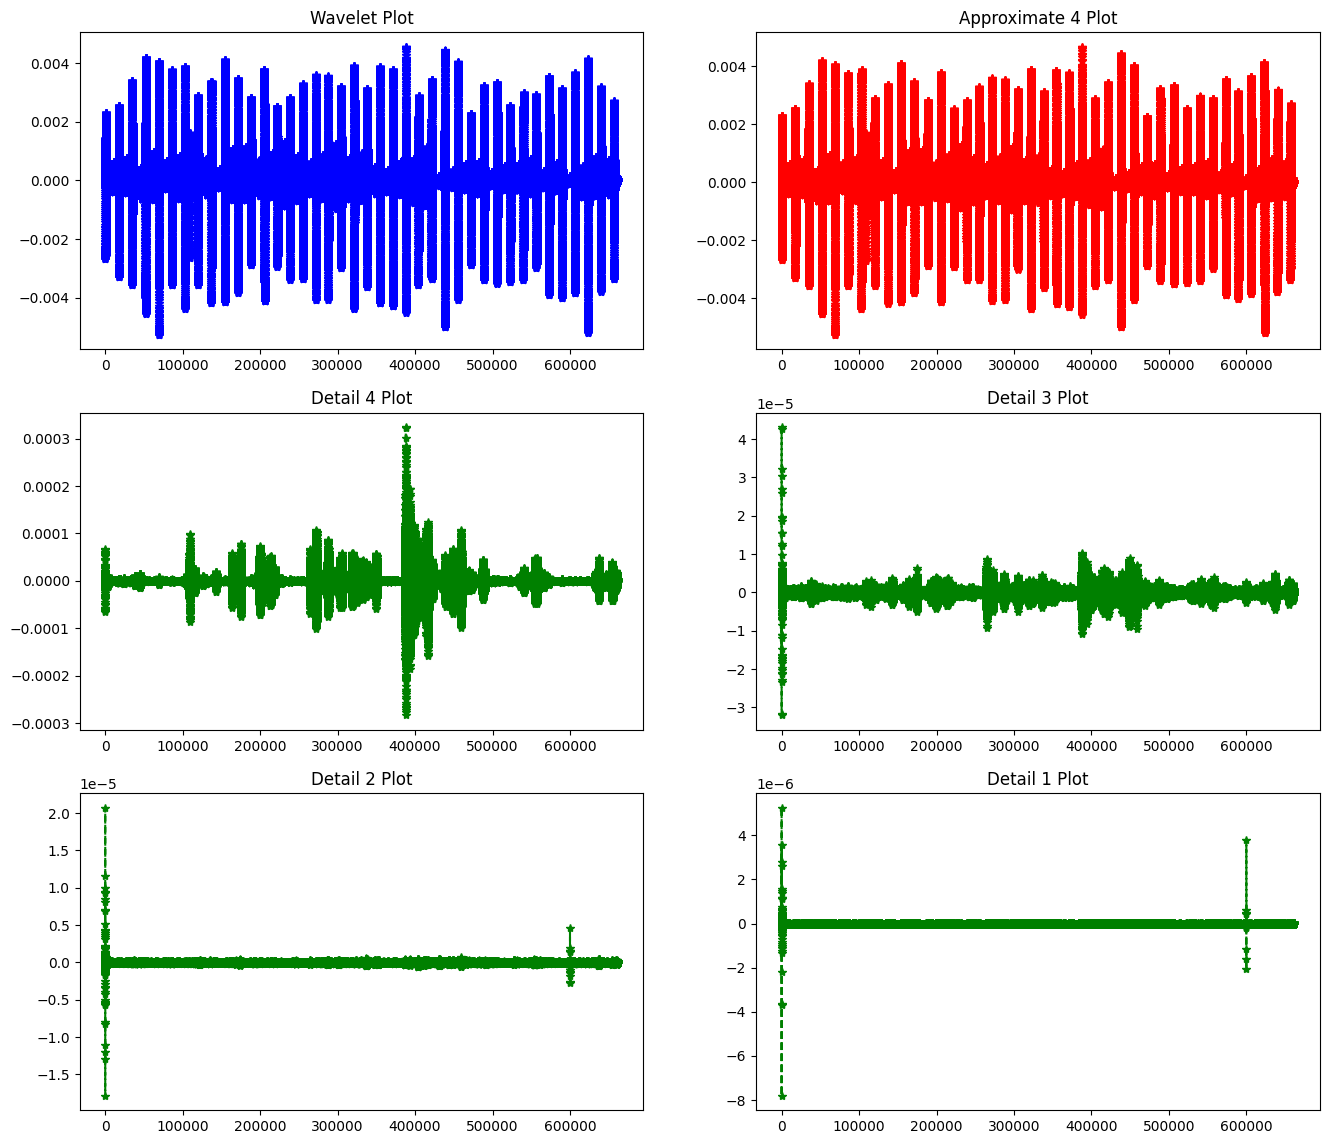

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(16,14))

axis[0, 0].plot(wavelets, '--*b')
axis[0, 0].set_title("Wavelet Plot")

axis[0, 1].plot(A4, '--*r')
axis[0, 1].set_title("Approximate 4 Plot")

axis[1, 0].plot(D4, '--*g')
axis[1, 0].set_title("Detail 4 Plot")

axis[1, 1].plot(D3, '--*g')
axis[1, 1].set_title("Detail 3 Plot")

axis[2, 0].plot(D2, '--*g')
axis[2, 0].set_title("Detail 2 Plot")

axis[2, 1].plot(D1, '--*g')
axis[2, 1].set_title("Detail 1 Plot")

plt.show()